In [4]:
import pandas as pd
from eventregistry import *
import json, os, sys

In [7]:
sector_keywords = {
    "Materials": ["mining", "chemical manufacturing", "raw materials"],
    "Industrials": ["manufacturing", "industrial equipment", "aerospace"],
    "Health Care": ["pharmaceuticals", "biotechnology", "health services"],
    "Real Estate": ["property development", "housing market", "commercial real estate"],
    "Consumer Discretionary": ["retail", "leisure products", "automobiles"],
    "Financials": ["banking", "investment"],
    "Utilities": ["electricity", "natural gas", "water services"],
    "Information Technology": ["software", "hardware", "tech services"],
    "Energy": ["oil", "renewable energy", "gas"],
    "Consumer Staples": ["food products", "household goods", "beverages"],
    "Communication Services": ["telecom", "media", "advertising"]
}

contextual_keywords = [
    "earnings", "trends", "market", "analysis", "SP400 Mid Cap"
]

In [8]:
def generate_keywords(sector_keywords, context_keywords):
    combined_keywords = {}
    for sector, base_keywords in sector_keywords.items():
        combined_keywords[sector] = []
        for base in base_keywords:
             combined_keywords[sector].append(base)
        for context in context_keywords:
                combined_keywords[sector].append(context)
    return combined_keywords

In [9]:
keyword = generate_keywords(sector_keywords, contextual_keywords)

In [10]:
keyword['Financials']

['banking',
 'investment',
 'earnings',
 'trends',
 'market',
 'analysis',
 'SP400 Mid Cap']

In [11]:
er = EventRegistry(apiKey = "cfd38812-1b95-4114-b0c0-39efacba95cf")

q = QueryArticlesIter(
    keywords = QueryItems.OR(keyword['Financials']),
    dateStart="2023-10-11",
    dateEnd="2023-10-11",
    lang="eng")

print("Number of results: %d" % q.count(er))

tmp = []
for art in q.execQuery(er, sortBy="rel", maxItems=5):
    print(json.dumps(art, indent=4))
    tmp.append(art)

Number of results: 28272
{
    "uri": "7778961689",
    "lang": "eng",
    "isDuplicate": false,
    "date": "2023-10-11",
    "time": "15:23:09",
    "dateTime": "2023-10-11T15:23:09Z",
    "dateTimePub": "2023-10-11T15:20:37Z",
    "dataType": "news",
    "sim": 0,
    "url": "https://www.streetinsider.com/SEC+Filings/Form+424B2+JPMORGAN+CHASE+%26amp%3B+CO/22261949.html",
    "title": "Form  424B2      JPMORGAN CHASE &amp; CO",
    "body": "The information in this preliminary pricing supplement is not complete and may be changed. This preliminary pricing supplement is not an offer to sell nor does it seek an offer to buy these securities in any jurisdiction where the offer or sale is not permitted.\n\nPricing Supplement to the Prospectus and Prospectus Supplement, each dated April 13, 2023, the Underlying Supplement No. 1-I dated April 13, 2023 and the Product Supplement No. 4-I dated April 13, 2023\n\nJPMorgan Chase Financial Company LLC\n\nMedium-Term Notes, Series A\n\n$\n\nBuffer

In [25]:
tmp[4]

{'uri': '7779146564',
 'lang': 'eng',
 'isDuplicate': False,
 'date': '2023-10-11',
 'time': '17:21:44',
 'dateTime': '2023-10-11T17:21:44Z',
 'dateTimePub': '2023-10-11T17:20:38Z',
 'dataType': 'news',
 'sim': 0,
 'url': 'https://www.streetinsider.com/Globe+Newswire/Crown+Place+VCT+PLC%3A+Annual+Financial+Report/22262433.html',
 'title': 'Crown Place VCT PLC: Annual Financial Report',
 'body': 'As required by the UK Listing Authority\'s Disclosure Guidance and Transparency Rules 4.1 and 6.3, Crown Place VCT PLC today makes public its information relating to the Annual Report and Financial Statements for the year ended 30 June 2023.\n\nThis announcement was approved for release by the Board of Directors on 11 October 2023.\n\nThis announcement has not been audited.\n\nThe Annual Report and Financial Statements for the year ended 30 June 2023 (which have been audited), will shortly be sent to shareholders. Copies of the full Annual Report and Financial Statements will be shown via the A

In [24]:
for art in tmp:
    print(art['sentiment'])

0.01960784313725483
0.1686274509803922
0.2705882352941176
0.3960784313725489
0.1686274509803922


In [13]:
full = ''
for art in tmp:
    title = art['title'].strip()
    boby = art['body'].strip()
    content = title + " " +  boby
    full += content

full = re.sub(r'\s+', ' ', full).strip()


In [14]:
with open("articles_content_2023.txt", "w") as file:
    file.write(full)

## start

In [15]:
with open("articles_content_2023.txt", "r") as file:
    content = file.read()

In [16]:
content[0:100]

'Form 424B2 JPMORGAN CHASE &amp; CO The information in this preliminary pricing supplement is not com'

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


In [18]:
tokens = word_tokenize(content)

In [19]:
stop_words = set(stopwords.words('english'))

tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]

In [20]:
processed_text = ' '.join(tokens)

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

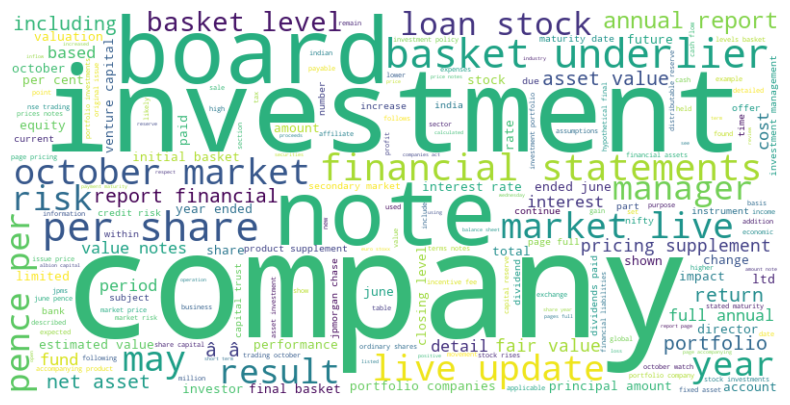

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()